In [1]:
import glob
import os
import random

import numpy as np
import model.transforms as transforms
import utils.utils as utils
import utils.utils_o3d as utils_o3d

import matplotlib.pyplot as plt

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [4]:
random.seed(0)

GESTURES_SET = (
    'start',
    'select',
)

# PC_DATA_DIR = os.path.join(
#     os.path.expanduser('~'),
#     'personal',
#     'gestures_navigation',
#     'pc_data',
#     'dataset',
# )
PC_DATA_DIR = os.path.join(
    'D:\\',
    'GesturesNavigation',
    'dataset',
)

resized_image_size = (72, 128)

norm = transforms.NormalizeDepth(with_inverse=True)
rgb_depth_to_rgb = transforms.RGBDepthToRGBD(
    rgb_transforms=None,
    depth_transforms=norm,
)

data_list = [
    d for d in glob.glob(os.path.join(PC_DATA_DIR, 'G*/*/*/*'))
    if d.split(os.path.sep)[-3] in GESTURES_SET
]

figsize = (15, 20)

In [11]:
idx = random.randint(0, 120)
sample = random.sample(data_list, 1)[0]

rgb_path = os.path.join(sample, f'{str(idx).zfill(5)}.jpg')
depth_path = os.path.join(sample, f'{str(idx).zfill(5)}.png')

In [12]:
tf = rgb_depth_to_rgb(rgb_path)

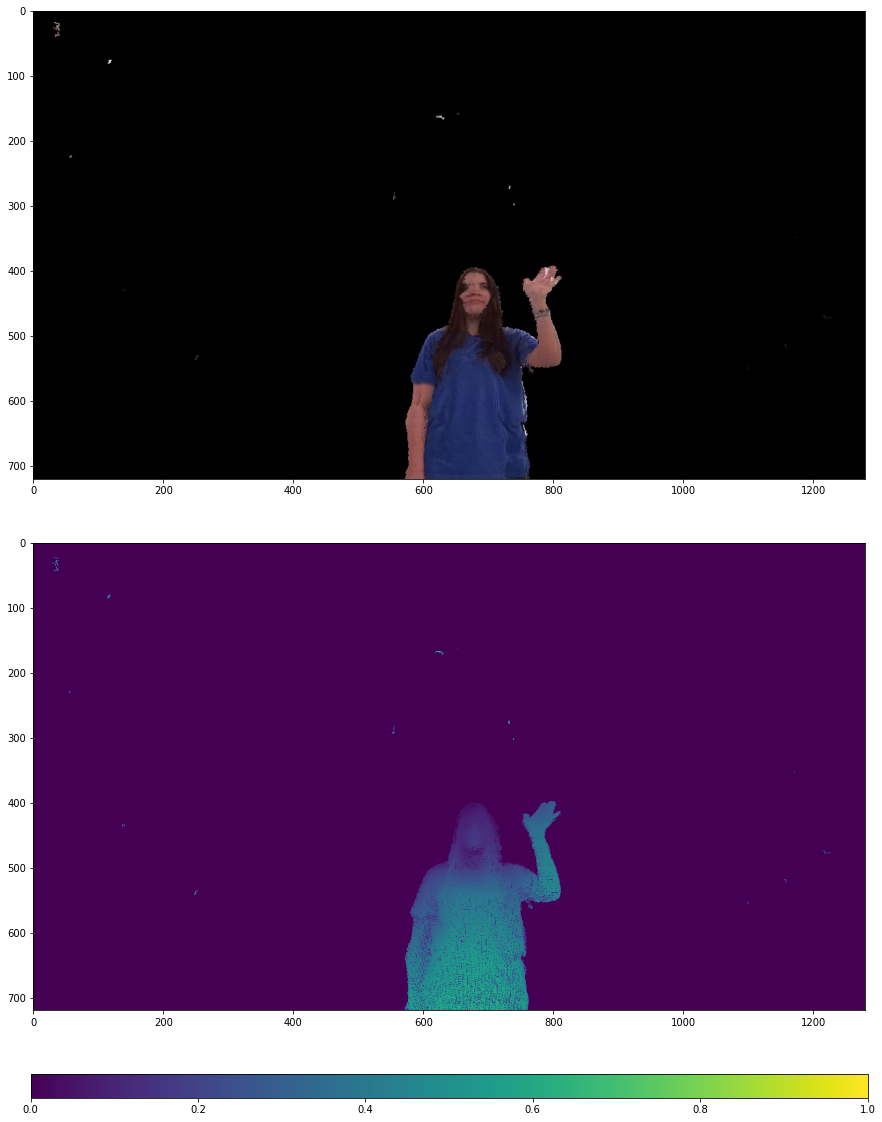

In [13]:
fig, (ax_rgb, ax_depth, ax_bar) = plt.subplots(nrows=3, figsize=figsize, gridspec_kw={"height_ratios": [1, 1, 0.05]})
im_rgb = ax_rgb.imshow(tf[:3].permute(1, 2, 0).numpy())
im_depth = ax_depth.imshow(tf[-1].numpy())
fig.colorbar(im_depth, cax=ax_bar, orientation='horizontal')
plt.show()

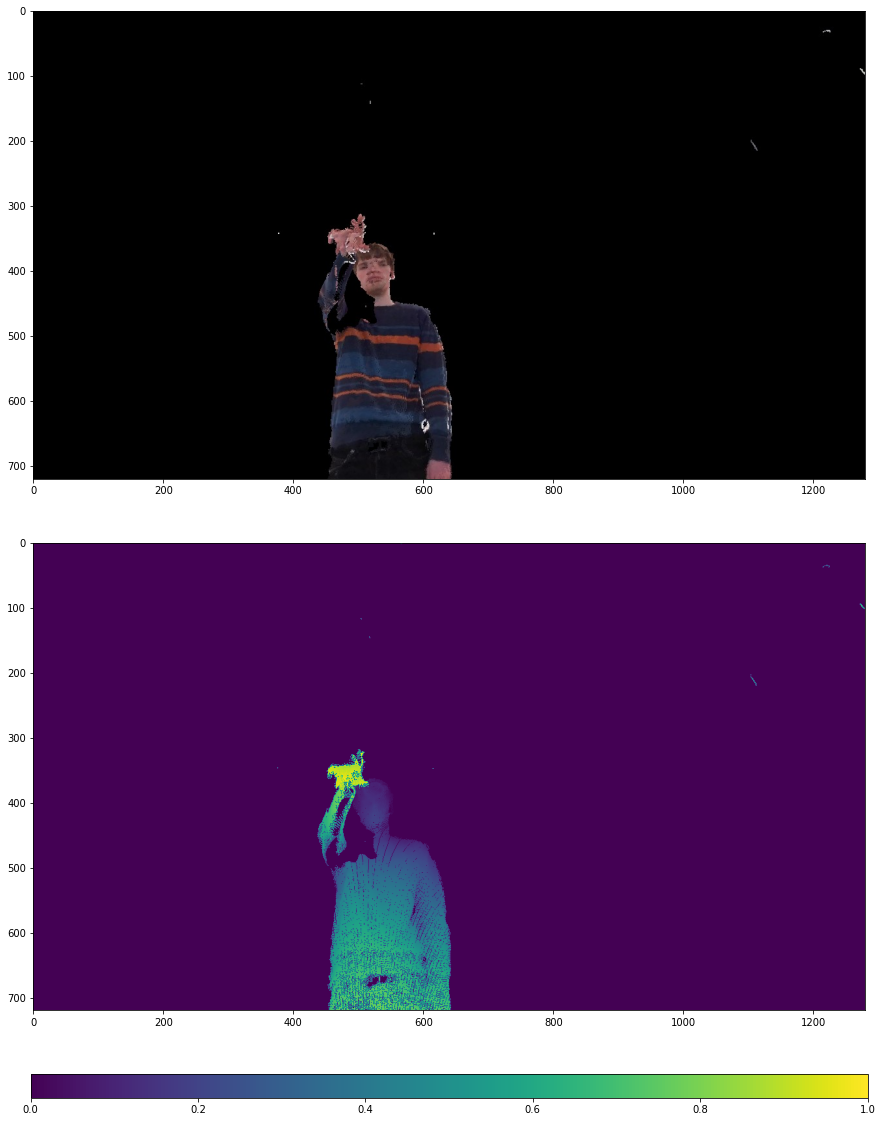

In [15]:
idx = random.randint(0, 120)
sample = random.sample(data_list, 1)[0]

path = os.path.join(sample, f'{str(idx).zfill(5)}.jpg')

tf = rgb_depth_to_rgb(path)

fig, (ax_rgb, ax_depth, ax_bar) = plt.subplots(nrows=3, figsize=figsize, gridspec_kw={"height_ratios": [1, 1, 0.05]})
im_rgb = ax_rgb.imshow(tf[:3].permute(1, 2, 0).numpy())
im_depth = ax_depth.imshow(tf[-1].numpy())
fig.colorbar(im_depth, cax=ax_bar, orientation='horizontal')
plt.show()

In [17]:
PC_DATA_DIR = os.path.join(
    'D:\\',
    'GesturesNavigation',
    'dataset',
)

CAMERAS_DIR = ('cam_center',)
CALIBRATION_DIR = os.path.join(
    os.path.dirname(PC_DATA_DIR),
    'gestures_navigation',
    'data',
    'calib_params',
)
CALIBRATION_INTRINSIC = {
    'cam_center': '1m.json',
}

RENDER_OPTION = os.path.join(
    os.path.dirname(PC_DATA_DIR),
    'gestures_navigation',
    'data',
    'render_option.json'
)

main_camera_index = 0

batch_size = 1
frames = 1
base_fps = 30
target_fps = 5
resized_image_size = (72, 128)

angle = np.deg2rad(-30)
z_target = 1.25

loc = np.array([0., 0., 0., 0., 0., 0.])
scale = np.array([np.pi/24, np.pi/18, np.pi/48, 0.2, 0.1, 0.1]) / 1.5

intrinsics_paths = [os.path.join(CALIBRATION_DIR, CALIBRATION_INTRINSIC[camera])
                    for camera in CAMERAS_DIR]
intrinsics = utils.get_intrinsics(intrinsics_paths)[main_camera_index]

*image_size, = map(int, intrinsics[:2])

visualizer = utils_o3d.get_visualizer(image_size, RENDER_OPTION)

pc_to_rgb = transforms.PointCloudToRGBD(
    batch_size,
    intrinsics,
    visualizer,
    angle=angle,
    z_target=z_target,
    loc=loc,
    scale=scale,
    rgb_transforms=None,
    depth_transforms=norm,
)

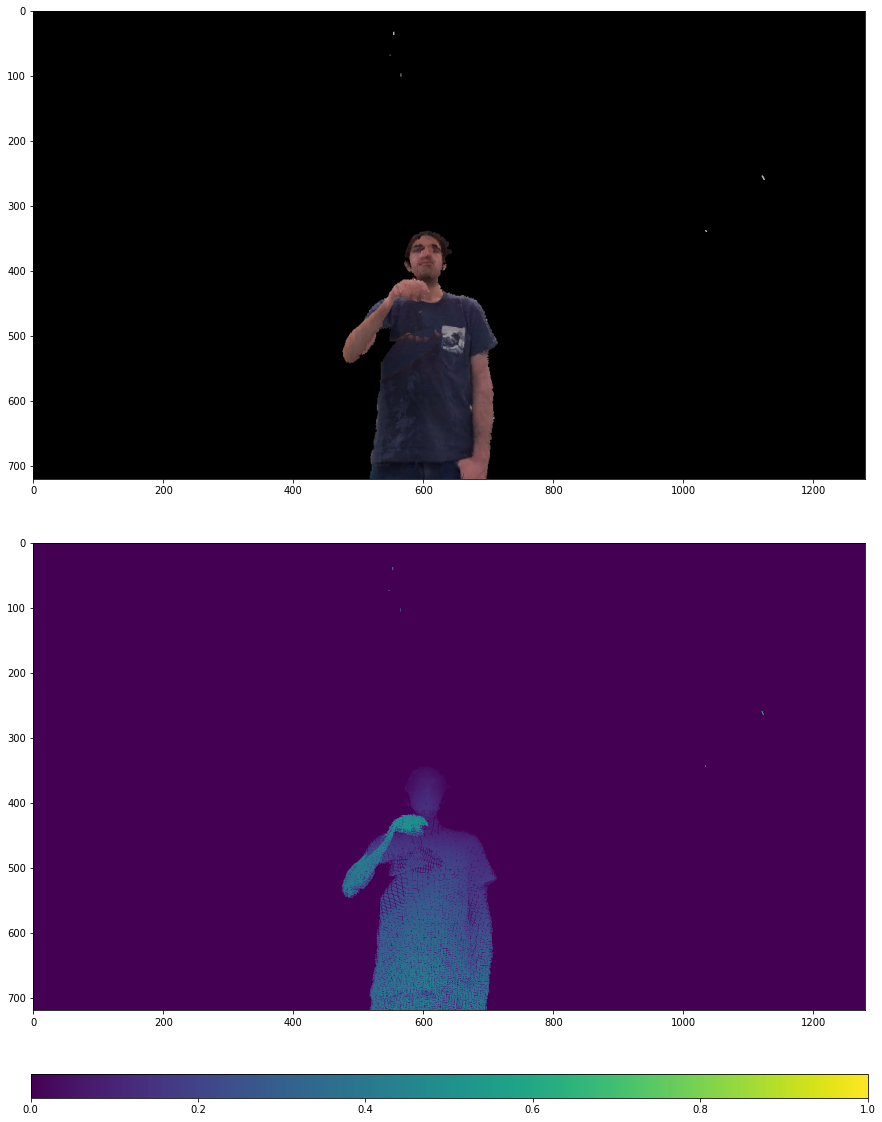

In [19]:
idx = random.randint(0, 120)
sample = random.sample(data_list, 1)[0]

path = os.path.join(sample, f'{str(idx).zfill(5)}.pcd')

tf = pc_to_rgb(path, 0)

fig, (ax_rgb, ax_depth, ax_bar) = plt.subplots(nrows=3, figsize=figsize, gridspec_kw={"height_ratios": [1, 1, 0.05]})
im_rgb = ax_rgb.imshow(tf[:3].permute(1, 2, 0).numpy())
im_depth = ax_depth.imshow(tf[-1].numpy())
fig.colorbar(im_depth, cax=ax_bar, orientation='horizontal')
plt.show()

In [20]:
visualizer.destroy_window()